QUESTION 1:

In [4]:
import numpy as np 
import os 
###https://www.geeksforgeeks.org/working-zip-files-python/
##import zip code from here

# importing required modules 
from zipfile import ZipFile 


  
# opening the zip file in READ mode 
with ZipFile('/content/drive/My Drive/20_newsgroups.zip', 'r') as zip: 
    # printing all the contents of the zip file 
    # zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall()
    print('Done!')

Extracting all the files now...
Done!


In [6]:
!pip install num2words

     |████████████████████████████████| 102kB 4.2MB/s 


In [7]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 18 20:46:09 2020
MT19049
@author: akanksha
"""

from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 
from num2words import num2words
import re
import string
import math

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
import pickle

In [0]:
from sklearn.manifold import TSNE
from operator import add,sub

In [0]:
import matplotlib.pyplot as plt 

In [0]:



def preprocessing(text):
    token_list=[]
    temp = re.findall(r'\d+', text) 
    res = list(map(int, temp)) 
    s=""
    for i in res:
        
        s=s+num2words(i)+" "
    text=text+" "+s
    
    text=text.strip()
    table = str.maketrans('', '', string.punctuation)
    
    text = text.translate(table)
    text=re.sub(r'\d+','',text)
    token_list=word_tokenize(text)
    stop_words=set(stopwords.words('english'))
    token_list=[token for token in token_list if not token in stop_words]
    token_list=[token.lower() for token in token_list]
    ps=PorterStemmer()
    token_list=[ps.stem(token) for token in token_list]
    
    return token_list


In [0]:
def length_doc():
    l=[]
    for i in range(doc_id+1):
        l.append(0)
    for term,posting_dic in inverted_index.items():
       # print("term:",term)
       # print("posting:",posting)
        idf=math.log(doc_id/posting_dic[0])
        for d,freq in posting_dic[1].items():
            if freq!=0:
                tf=1+math.log(freq)
            else:
                tf=0
            l[d]+=round(tf*idf*tf*idf,4)
    return l

In [0]:
def cosine_Similairity_fun(query,l):
    score=[]
    score_final=[]
    for i in range(doc_id+1):
        score.append([i,0])
    for t in query:
        if t in inverted_index:
            idf=math.log(doc_id/inverted_index[t][0])
            for d,freq in inverted_index[t][1].items():
                if freq!=0:
                    tf=1+math.log(freq)
                else: 
                    tf=0
                score[d][0]+=round(tf*idf,4)
                
    for i in range(doc_id+1):
        # print("stuck at :",i)
        # print("score[i]:",score[i])
        # print("score[i][0]:",score[i][0])
        # print("l[i]:",l[i])
        score_final.append([i,score[i][0]/l[i]])
    return score_final

In [0]:

def retrived_docs(score,k):
    result=[]
    result_id=[]
    l_score=len(score)
    print("top items are:")
    if k<=l_score:        
        
        for i in range(k):
            result.append([score[i][0],document_name_id[score[i][0]]])
            result_id.append(score[i][0])
    else:

        for i in range(len(score)):
            result.append([score[i][0],document_name_id[score[i][0]]])
            result_id.append(score[i][0])

    return result,result_id




In [0]:

#Buidling inverted index
# chnge
def build_index(ts,did,voc_id):
    for t in ts:
       
        if t in inverted_index:
            if(did in inverted_index[t][1]):
                inverted_index[t][1][did]+=1
            else:
                inverted_index[t][0]+=1
                inverted_index[t][1][did]=1
        else:
            
            inverted_index[t]=[]
            inverted_index[t].append(1)
            inverted_index[t].append({})
            inverted_index[t][1][did]=1
            voc_id+=1
            voc[voc_id]=t
    return voc_id  

In [16]:

import os
# folders=os.listdir("/content/20_newsgroups/")
folders=['comp.graphics','sci.med','talk.politics.misc','rec.sport.hockey','sci.space']
document_name_id={}
inverted_index={}
document_terms={}
voc={}
doc_id=-1
voc_id=-1
for folder in folders:
    print(folder)
    fpath='/content/20_newsgroups/'+ folder
    if(os.path.isdir(fpath)):
        file_names=os.listdir("/content/20_newsgroups/" + folder)
        for file_name in file_names:
           
            doc_id+=1
            document_name_id[doc_id]=[]
            document_name_id[doc_id].append(folder)
            document_name_id[doc_id].append(file_name)
            #file read karaaaa readFile("Data/" + folder+"/"+file_name)
            f = open("/content/20_newsgroups/" + folder+"/"+file_name, 'r',encoding ="ascii", errors ="surrogateescape")
           
            text=f.read()
            f.close()
            term_list=list(preprocessing(text))
            document_terms[doc_id]=term_list
            voc_id=build_index(term_list,doc_id,voc_id)

            

comp.graphics
sci.med
talk.politics.misc
rec.sport.hockey
sci.space


In [0]:
# saving:https://www.programcreek.com/python/example/191/pickle.dump
 with open('document_name_id.pickle', 'wb') as handle:
      pickle.dump(document_name_id, handle, protocol=pickle.HIGHEST_PROTOCOL)
 with open('voc.pickle', 'wb') as handle:
      pickle.dump(voc, handle, protocol=pickle.HIGHEST_PROTOCOL)
 with open('inverted_index.pickle', 'wb') as handle:
      pickle.dump(inverted_index, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
 



In [0]:
#loading: https://www.programcreek.com/python/example/191/pickle.dump
  with open('inverted_index.pickle', 'rb') as handle:
      inverted_index = pickle.load(handle)
  with open('document_name_id.pickle', 'rb') as handle:
      document_name_id = pickle.load(handle)
  with open('voc.pickle', 'rb') as handle:
      voc = pickle.load(handle)

In [0]:
def query_fuc():
  global query,leng
  query=input("enter the query:\n")
  k=int(input("enter the k:\n"))
  query=preprocessing(query)
  print(query)
  l=length_doc()
  leng=[]
  for i in l:
    leng.append(round(math.sqrt(i),3))
  # print("leng:",leng)
  score=cosine_Similairity_fun(query,leng)
  score.sort(key = lambda x: x[0],reverse=True)
  resultdetail,result_doc=retrived_docs(score,k)
  print("result document:",result_doc)

In [20]:
query_fuc()

enter the query:
Mach banding will occur for any image.  It is not the color quantization you see when you don't have enough bits.  It is the human eye's response to transitions or edges between intensities. The result is that colors near the transistion look brighter on the brighter side and darker on the darker side
enter the k:
10
['mach', 'band', 'occur', 'imag', 'it', 'color', 'quantiz', 'see', 'dont', 'enough', 'bit', 'it', 'human', 'eye', 'respons', 'transit', 'edg', 'intens', 'the', 'result', 'color', 'near', 'transist', 'look', 'brighter', 'brighter', 'side', 'darker', 'darker', 'side']
top items are:
result document: [4999, 4998, 4997, 4996, 4995, 4994, 4993, 4992, 4991, 4990]


In [0]:
# def cosine_Similairity_fun_opt(query_term,l,query_vector):
#     score=[]
#     score_final=[]
#     for i in range(doc_id+1):
#         score.append([0,i])
#     for t in query_term:
#         x=query_term.index(t)
#         if t in inverted_index:
#             #print(term)
#             idf=math.log(doc_id/inverted_index[t][0])
#             for d,freq in inverted_index[t][1].items():
#                 if freq!=0:
#                     tf=1+math.log(freq)
#                 else: 
#                     tf=0
#                 score[d][0]+=round(query_vector[x]*tf*idf,4) #title*weight+body*weight
#                 #print("score:",score)
                
#     for i in range(doc_id+1):
        
#         score_final.append([score[i][0]/l[i],i])
#     return score_final




# def qopt(r,nr,unique_query,query):

#   dR={}
#   dNr={}
#   q0={}
#   # print("relevant_feedback",relevant_feedback,"\n non relevant_feedback",non_relevant_feedback)
#   for term in vocab_dict.keys():
#     dR[term]=0
#     dNr[term]=0
#     q0[term]=0
#   for doc in r: 
#     for term,value in inverted_index.items():
#       if doc in inverted_index[term][1]:
#         dR[term]=dR[term]+(math.log((doc_id+1)/inverted_index[term][0])*(1+math.log(inverted_index[term][1][doc]+1)))
  
#   for doc in nr: 
#     for term,value in inverted_index.items():
#       if doc in inverted_index[term][1]:
#         dNr[term]=dNr[term]+(math.log((doc_id+1)/inverted_index[term][0])*(1+math.log(inverted_index[term][1][doc]+1)))
#   for term in unique_query:
#     q0[term]=q0[term]+math.log((doc_id+1)/inverted_index[term][0])*(1+math.log(1+query.count(term)))
    


#   print("dR  :",dR.values())
#   print("dNr :",dNr.values())
#   print("q0  :",q0.values())
#   apha=float(input("enter alpha:"))
#   beta=float(input("enter beta:"))
#   gamma=float(input("enter gamma:"))
#   dR_list=list(dR.values())
#   dNr_list=list(dNr.values())
#   q0_list=list(q0.values())
#   q_optimized=[]
#   q_new=[]
#   q_val=[]
#   for i in range(0,len(dR)):
#     q_optimized.append(gamma*q0_list[i]+(apha/len(r))*dR_list[i]-(beta/len(nr))*dNr_list[i])
#   print("q_optimized:",q_optimized)
#   for i in range(0,len(q_optimized)):
#     if q_optimized[i]>0.0:
#       q_val.append(q_optimized[i])
#       q_new.append(vocabs[i])
#   print(q_new)
#   return q_new,q_val
      


# def query_fun():
#     print("++++++++++que2(a)++++++++++++++++")   
#     q=input('enter the query:\n')
#     query=preprocessing(q)
    
#     length=lengthOfDocuments()
#     print("query: ",query)
#     score=cosine_Similairity_fun(query,length)
#     score.sort(key = lambda x: x[0],reverse=True)
#     print(score)
#     k=int(input("enter the number of required document: \n"))
#     final_top_k,result_id=retrived_docs(score,k)
#     print("final_top_k: ",final_top_k)
#     print("result_id: ",result_id)
#     relevant_feedback=[]
#     non_relevant_feebdack=[]
#     print("++++++++++que2(b)++++++++++++++++\n")
#     n=int(input("enter the no. of relevent documnet: "))
   
#     for i in range(0,n):
#          x=int(input())
#          if x in result_id:
#            relevant_feedback.append(x)
           
#     print("relevant_feedback: ",relevant_feedback)
#     for i in result_id:
#       if i not in relevant_feedback:
#         non_relevant_feebdack.append(i)
#     print("non_relevant_feebdack:",non_relevant_feebdack)
#     print("++++++++++que2(c)++++++++++++++++")
#     query_term,query_vector=qopt( relevant_feedback,non_relevant_feebdack,list(set(query)),query)
#     print(" query_opt : ", query_term)
#     score_opt=cosine_Similairity_fun_opt(query_term,length,query_vector)
#     score_opt.sort(key = lambda x: x[0],reverse=True)
#     print(score_opt)
#     k_opt=int(input("enter the number of required document: \n"))
#     final_top_k_opt,result_id_opt=retrived_docs(score_opt,k_opt)
#     final_top_k_opt_show=[]
#     for i in final_top_k_opt:
#       # print(i," : ",type(i)," relevant_feedback: ",relevant_feedback)

#       if i[0] in relevant_feedback:
#           final_top_k_opt_show.append(str(i[0])+"*")
#       else:
#           final_top_k_opt_show.append(str(i[0]))
#     print("final_top_k optimise: ",final_top_k_opt_show)
#     print("result_id optimise: ",result_id_opt)

    

Question 2

In [0]:


def query_related_task(query): 
    query=preprocessing(query) 
    query_d={} 
    result_d={}
    query_ori=[]
    for i in query:
        if i in query_d:
            query_d[i]+=1
        else:
            query_d[i]=1
    # calcluting tfidf of query terms
    for k,v in query_d.items():
        if v!=0:
          term_freq=1+math.log(v)
        else:
          term_freq=0
        if k!=0:
          idf=math.log(doc_id/inverted_index[k][0])
        else:
          idf= 0
        query_d[k]=term_freq*idf    

    for i in range(0,len(voc)):
      query_ori.append(0)
    for k,v in voc.items():
      result_d[v]=k
    
    for k,v in result_d.items():
        if(k in result_d):
            w=result_d[k]
            query_ori[w]=v

    return query_ori

In [0]:
# https://github.com/williamscott701/Information-Retrieval/blob/master/Assignment%203/Rocchio's%20Algorithm.ipynb
# this code same as it is taken from above link.
def gen_tsne(Q_r, Q_nr, Q_m):
    tsne = TSNE(n_components=2, random_state=0)
    feature_vector = []
    labels = []
    for i in Q_r:
        feature_vector.append(i)
    
        labels.append(0)
    for i in Q_nr:
        feature_vector.append(i)

        labels.append(1)
    feature_vector.append(Q_m)

    labels.append(2)
    transformed_data = tsne.fit_transform(np.array(feature_vector))
    k = np.array(transformed_data)
    t = ("Relevant", "Non Relevant", "Query")
    plt.scatter(k[:, 0], k[:, 1], c=labels, label="Violet-R, Aqua-NR")
    plt.title("Rocchio Algorithm")
    plt.legend()
    plt.grid(True)


    plt.show()

In [0]:
def cosine_similairity_(query_u):
    score=[]
    t_list=[]
    score_result=[]
    for i in range(0,doc_id+1):
      score.append([0,i])
    
    for x,y in  enumerate(query_u):
      if y!=0:
        t_list.append([x,y])
    
    for x,y in t_list:
        word_=voc[x]
        if word_ in inverted_index:
            idf=math.log((doc_id+1)/inverted_index[word_][0])
            for doc,freq in inverted_index[word_][1].items():
                if freq!=0:
                  tf=1+math.log(freq)
                else:
                  tf= 0
                score[doc][0]=score[doc][0]+y*tf*idf 
                
    for i in range(doc_id):
      score_result.append([i,score[i][0]/leng[i]])
    return score_result

In [0]:
# def show(score,k,t):
#     r=[]
#     print("score:",score)
#     if k<=len(score):
#       for i in range(k):
#         r.append(score[i])      
#     else:
#       for i in range(k):
#         r.append(score[i])

#     print("result list value :",r)
#     t=list(t)
#     for x in r:
#         if x[0] in t:
#             print(" *   Doc id:",str(x[0]),"  Document: ",document_name_id[x[0]])
#         else:
#             print("Doc id:",str(x[0]),"  Document: ",document_name_id[x[0]])
      


In [0]:
def vector_conversion_doc(did):
    dict_={}
    d_vector=[]
    for key,value in voc.items():
      dict_[value]=key

    for i in range(0,len(voc)):
      d_vector.append(0)
    
   
    for k,v in inverted_index.items():
        if did in v[1]:
            tf=1+math.log(v[1][did])
            x=dict_[k]
            d_vector[x]=tf*(math.log((doc_id+1)/inverted_index[k][0]))
    return d_vector

In [0]:
def Rocchio(query,al,be,ga,k,p,gr_t):
 
    
    vector_q=query_related_task(query) 
     
    a1=p*k
    p=int(a1/100) 
    relevant_doc=[] 
    irrelevant_doc=[]
    list_map=[]
    for i in range(0,4):
        score=cosine_similairity_(vector_q)
        score.sort(key = lambda x: x[1],reverse=True)
        print(" iteration: ",i)

        print("relevant_doc:",relevant_doc)
        marked_doc,r=show_marked_document(score,k,relevant_doc)
       
        r_new=[]
        for i in r:
          r_new.append(i[0])
        print("Enter ",p," relevant documents id of ",gr_t," ")

        t=[]
        for i in range(p):
          t.append(int(input()))
        
        t_len=len(t)
        t_again=[]
        if t_len<p:
          for i in t[0:t_len]:
            t_again.append(t[i])
        else:
          for i in t[0:p]:
            t_again.append(i)
    

        relevant_doc=t_again
        # for i in range(len(t_again)):
        #   relevant_doc.append(t_again[i])
        # print("Relevant Docuemnst for que 2 :",relevant_doc)

        relevant_doc=set(relevant_doc)
        irrelevant_doc=set(irrelevant_doc)        

        irrelevant_doc= set(r_new).difference( relevant_doc.union(marked_doc))
        # a1=set(r_new)-relevant_doc
        # a1=a1.union(irrelevant_doc)
        # irrelevant_doc=a1.difference(relevant_doc)

        vector_r=[] 
        vector_ir=[] 
        for i in relevant_doc:
           vector_r.append(vector_conversion_doc(i))

        for i in irrelevant_doc:
           vector_ir.append(vector_conversion_doc(i))



# https://github.com/williamscott701/Information-Retrieval/blob/master/Assignment%203/Rocchio's%20Algorithm.ipynb
        gen_tsne(vector_r,vector_ir,vector_q)
        m=[]
        m.append(precision_recall(score,relevant_doc,k))


        vector_q=optimized_query(vector_r,vector_ir,vector_q,al,be,ga)
        relevant_doc=list(relevant_doc)
        irrelevant_doc=list(irrelevant_doc)
        r_new=list(r_new)
    return m
        

In [0]:

def precision_recall(score,relevant_doc,k):
    r_list=[]
    # initialise or precision and recall assumption:
    re=[0]
    pr=[1]
    len_score=len(score)
    if k<=len_score:
        for i in score[0:k]:
          r_list.append(i[0])
    else:
       for i in score[0:len_score]:
         r_list.append(i[0])

    t=0
    m=0
    c=0        

    for i in r_list:
        c=c+1
        if i in relevant_doc:
            t=t+1
            m=m+t/c
        ans=t/c
        pr.append(ans)
        re.append(t/1000)
    if t==0:
      m=0
    else:    
      m=m/t
    plt.plot(re,pr) 
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
    return m

In [0]:
def optimized_query(relevant_doc,irrelevant_doc,query,alpha,beta,gamma):
    r_centroid=[]
    ir_centroid=[]
    r_centroid_new=[]
    ir_centroid_new=[]
    query_new=[]
    final_query_new=[]
    final_query=[]    

    for i in query:
      query_new.append(alpha*i)

    for i in range(0,len(voc)):
      r_centroid.append(0)
      ir_centroid.append(0)
    
    for i in relevant_doc:
        r_centroid=list( map(add, r_centroid, i) )
    r_centroid_new=[]
    for i in r_centroid:
       r_centroid_new.append(beta*i)

    for i in irrelevant_doc:
        ir_centroid=list( map(add, ir_centroid,i) )
    for i in ir_centroid:
        ir_centroid_new.append(gamma*i)



    a1=map(sub,r_centroid_new, ir_centroid_new)
    a1=map(add,query,list( a1 ))
    final_query=list(a1)
    for i in final_query:
      final_query_new.append(i)
    for i in range(0,len(final_query_new)):
      if final_query_new[i] < 0:
        final_query_new[i]=0
      else:
        final_query_new[i]=i
   
    return final_query_new

In [0]:
def show_marked_document(score,k,relvant):
    r=[]
    marked_doc=[]
    print("score:",score)
    if k<=len(score):
      for i in range(k):
        r.append(score[i])      
    else:
      for i in range(k):
        r.append(score[i])

    print("result list value :",r)
    
    for x in r:
        # print("i am at main :",relvant)
        # print(x[0])
        if x[0] in relvant:
            # print("i am at *")
            marked_doc.append(x[0])
            print(" *   Doc id:",str(x[0]),"  Document: ",document_name_id[x[0]])
        else:
            print("Doc id:",str(x[0]),"  Document: ",document_name_id[x[0]])
        
    return marked_doc,r

enter value of k : 100
enter value of p : 10
 iteration:  0
relevant_doc: []
score: [[3268, 825847.4624209729], [4744, 824588.5521527416], [3842, 754645.0789205636], [4718, 710816.8645076015], [4601, 605929.1086802143], [3664, 605136.4468640698], [3844, 584953.918252273], [3370, 583960.8043120682], [4882, 578210.7842761894], [3398, 567392.656406915], [3701, 556330.5318032578], [1833, 553797.6120289589], [3187, 536843.8555968085], [1949, 505733.73282910057], [4171, 496167.8248994336], [4015, 466278.5480858339], [3395, 461583.97364351474], [3350, 461347.534098511], [3162, 459709.70932611695], [2367, 450549.37174486904], [3785, 442204.3150218199], [2674, 438931.84031664295], [3256, 438190.2347509248], [4763, 427404.96943378326], [2155, 426496.82450000866], [1538, 421670.703382543], [4383, 420750.38561608584], [3299, 404970.99208796065], [4655, 394312.8506846086], [3761, 386056.26479431364], [4017, 383812.9806651924], [3147, 383255.7393007372], [3294, 376009.0624460326], [4541, 373439.1635

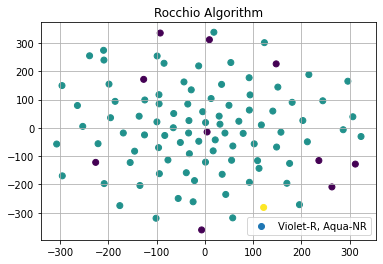

 iteration:  1
relevant_doc: [1795, 1444, 1542, 1447, 1228, 1836, 1904, 1682, 1655, 1656]
score: [[3268, 825847.1845034522], [4744, 824588.2643015268], [3842, 754645.0789205636], [4718, 710816.8645076015], [4601, 605928.7315823755], [3664, 605136.4468640698], [3844, 584953.918252273], [3370, 583960.8043120682], [4882, 578210.5522548696], [3398, 567392.656406915], [3701, 556330.5318032578], [1833, 553797.4389194555], [3187, 536843.657791624], [1949, 505733.5873934274], [4171, 496167.63826506137], [4015, 466278.20598205685], [3395, 461583.97364351474], [3350, 461347.534098511], [3162, 459709.70932611695], [2367, 450549.37174486904], [3785, 442204.3150218199], [2674, 438931.56471857114], [3256, 438190.2347509248], [4763, 427404.81767648977], [2155, 426496.6000530677], [1538, 421670.49963311054], [4383, 420750.1397558622], [3299, 404970.99208796065], [4655, 394312.5516432429], [3761, 386056.26479431364], [4017, 383812.9806651924], [3147, 383255.7393007372], [3294, 376009.0624460326], [4541

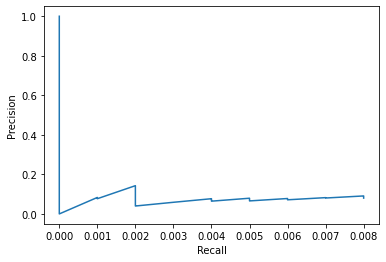

 iteration:  2
relevant_doc: [1542, 1447, 1833, 1740, 1583, 1904, 1682, 1656, 1401, 1949]
score: [[3268, 825847.1845034522], [4744, 824588.2643015268], [3842, 754645.0789205636], [4718, 710816.8645076015], [4601, 605928.7315823755], [3664, 605136.4468640698], [3844, 584953.918252273], [3370, 583960.8043120682], [4882, 578210.5522548696], [3398, 567392.656406915], [3701, 556330.5318032578], [1833, 553797.4389194555], [3187, 536843.657791624], [1949, 505733.5873934274], [4171, 496167.63826506137], [4015, 466278.20598205685], [3395, 461583.97364351474], [3350, 461347.534098511], [3162, 459709.70932611695], [2367, 450549.37174486904], [3785, 442204.3150218199], [2674, 438931.56471857114], [3256, 438190.2347509248], [4763, 427404.81767648977], [2155, 426496.6000530677], [1538, 421670.49963311054], [4383, 420750.1397558622], [3299, 404970.99208796065], [4655, 394312.5516432429], [3761, 386056.26479431364], [4017, 383812.9806651924], [3147, 383255.7393007372], [3294, 376009.0624460326], [4541

 iteration:  3
relevant_doc: [1538, 1795, 1444, 1542, 1447, 1228, 1836, 1964, 1904]
score: [[3268, 825847.1845034522], [4744, 824588.2643015268], [3842, 754645.0789205636], [4718, 710816.8645076015], [4601, 605928.7315823755], [3664, 605136.4468640698], [3844, 584953.918252273], [3370, 583960.8043120682], [4882, 578210.5522548696], [3398, 567392.656406915], [3701, 556330.5318032578], [1833, 553797.4389194555], [3187, 536843.657791624], [1949, 505733.5873934274], [4171, 496167.63826506137], [4015, 466278.20598205685], [3395, 461583.97364351474], [3350, 461347.534098511], [3162, 459709.70932611695], [2367, 450549.37174486904], [3785, 442204.3150218199], [2674, 438931.56471857114], [3256, 438190.2347509248], [4763, 427404.81767648977], [2155, 426496.6000530677], [1538, 421670.49963311054], [4383, 420750.1397558622], [3299, 404970.99208796065], [4655, 394312.5516432429], [3761, 386056.26479431364], [4017, 383812.9806651924], [3147, 383255.7393007372], [3294, 376009.0624460326], [4541, 3734

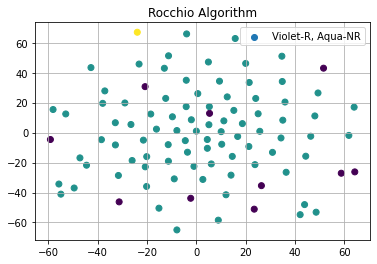

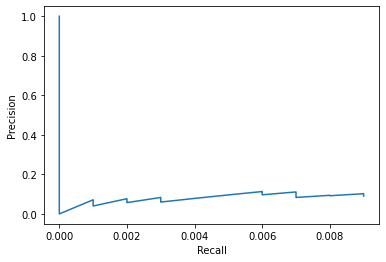

 iteration:  0
relevant_doc: []
score: [[3268, 825847.4624209729], [4744, 824588.5521527416], [3842, 754645.0789205636], [4718, 710816.8645076015], [4601, 605929.1086802143], [3664, 605136.4468640698], [3844, 584953.918252273], [3370, 583960.8043120682], [4882, 578210.7842761894], [3398, 567392.656406915], [3701, 556330.5318032578], [1833, 553797.6120289589], [3187, 536843.8555968085], [1949, 505733.73282910057], [4171, 496167.8248994336], [4015, 466278.5480858339], [3395, 461583.97364351474], [3350, 461347.534098511], [3162, 459709.70932611695], [2367, 450549.37174486904], [3785, 442204.3150218199], [2674, 438931.84031664295], [3256, 438190.2347509248], [4763, 427404.96943378326], [2155, 426496.82450000866], [1538, 421670.703382543], [4383, 420750.38561608584], [3299, 404970.99208796065], [4655, 394312.8506846086], [3761, 386056.26479431364], [4017, 383812.9806651924], [3147, 383255.7393007372], [3294, 376009.0624460326], [4541, 373439.1635243564], [2826, 369861.08962726867], [1836, 3

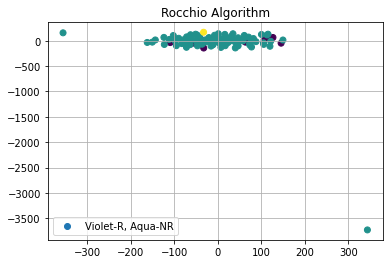

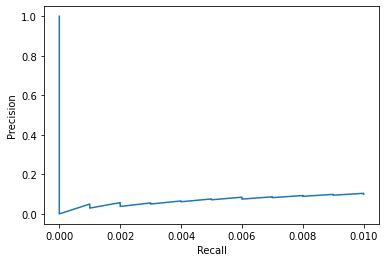

 iteration:  1
relevant_doc: [2531, 2473, 2826, 2443, 2994, 2772, 2359, 2842, 2398, 2367]
score: [[3268, 825847.2694884207], [4744, 824587.5973898303], [3842, 754645.0789205636], [4718, 710816.8645076015], [4601, 605928.4367186486], [3664, 605136.4468640698], [3844, 584953.918252273], [3370, 583960.8043120682], [4882, 578210.2270317896], [3398, 567392.656406915], [3701, 556330.3222141686], [1833, 553797.6120289589], [3187, 536843.8555968085], [1949, 505733.33106829884], [4171, 496167.28871369007], [4015, 466277.8356631895], [3395, 461583.97364351474], [3350, 461347.534098511], [3162, 459709.70932611695], [2367, 450549.0678663708], [3785, 442204.1313263084], [2674, 438931.61431879655], [3256, 438190.0573607699], [4763, 427404.55940859317], [2155, 426496.6000530677], [1538, 421670.22182841226], [4383, 420749.75521940505], [3299, 404970.99208796065], [4655, 394312.8506846086], [3761, 386056.26479431364], [4017, 383812.77945504396], [3147, 383255.7393007372], [3294, 376009.0624460326], [45

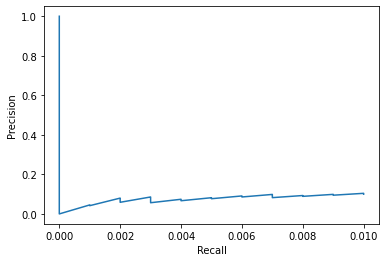

 iteration:  2
relevant_doc: [2531, 2473, 2826, 2155, 2443, 2994, 2674, 2772, 2359, 2398]
score: [[3268, 825847.2694884207], [4744, 824587.5973898303], [3842, 754645.0789205636], [4718, 710816.8645076015], [4601, 605928.4367186486], [3664, 605136.4468640698], [3844, 584953.918252273], [3370, 583960.8043120682], [4882, 578210.2270317896], [3398, 567392.656406915], [3701, 556330.3222141686], [1833, 553797.6120289589], [3187, 536843.8555968085], [1949, 505733.33106829884], [4171, 496167.28871369007], [4015, 466277.8356631895], [3395, 461583.97364351474], [3350, 461347.534098511], [3162, 459709.70932611695], [2367, 450549.0678663708], [3785, 442204.1313263084], [2674, 438931.61431879655], [3256, 438190.0573607699], [4763, 427404.55940859317], [2155, 426496.6000530677], [1538, 421670.22182841226], [4383, 420749.75521940505], [3299, 404970.99208796065], [4655, 394312.8506846086], [3761, 386056.26479431364], [4017, 383812.77945504396], [3147, 383255.7393007372], [3294, 376009.0624460326], [45

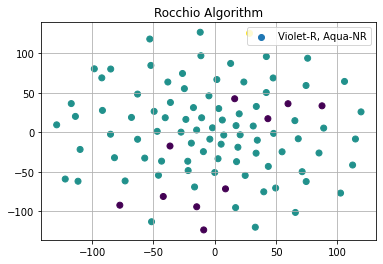

 iteration:  3
relevant_doc: [2531, 2920, 2473, 2826, 2155, 2674, 2359, 2842, 2398, 2367]
score: [[3268, 825847.2694884207], [4744, 824587.5973898303], [3842, 754645.0789205636], [4718, 710816.8645076015], [4601, 605928.4367186486], [3664, 605136.4468640698], [3844, 584953.918252273], [3370, 583960.8043120682], [4882, 578210.2270317896], [3398, 567392.656406915], [3701, 556330.3222141686], [1833, 553797.6120289589], [3187, 536843.8555968085], [1949, 505733.33106829884], [4171, 496167.28871369007], [4015, 466277.8356631895], [3395, 461583.97364351474], [3350, 461347.534098511], [3162, 459709.70932611695], [2367, 450549.0678663708], [3785, 442204.1313263084], [2674, 438931.61431879655], [3256, 438190.0573607699], [4763, 427404.55940859317], [2155, 426496.6000530677], [1538, 421670.22182841226], [4383, 420749.75521940505], [3299, 404970.99208796065], [4655, 394312.8506846086], [3761, 386056.26479431364], [4017, 383812.77945504396], [3147, 383255.7393007372], [3294, 376009.0624460326], [45

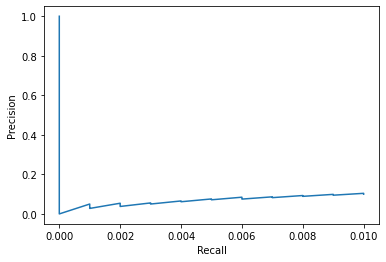

 iteration:  0
relevant_doc: []
score: [[3268, 825847.4624209729], [4744, 824588.5521527416], [3842, 754645.0789205636], [4718, 710816.8645076015], [4601, 605929.1086802143], [3664, 605136.4468640698], [3844, 584953.918252273], [3370, 583960.8043120682], [4882, 578210.7842761894], [3398, 567392.656406915], [3701, 556330.5318032578], [1833, 553797.6120289589], [3187, 536843.8555968085], [1949, 505733.73282910057], [4171, 496167.8248994336], [4015, 466278.5480858339], [3395, 461583.97364351474], [3350, 461347.534098511], [3162, 459709.70932611695], [2367, 450549.37174486904], [3785, 442204.3150218199], [2674, 438931.84031664295], [3256, 438190.2347509248], [4763, 427404.96943378326], [2155, 426496.82450000866], [1538, 421670.703382543], [4383, 420750.38561608584], [3299, 404970.99208796065], [4655, 394312.8506846086], [3761, 386056.26479431364], [4017, 383812.9806651924], [3147, 383255.7393007372], [3294, 376009.0624460326], [4541, 373439.1635243564], [2826, 369861.08962726867], [1836, 3

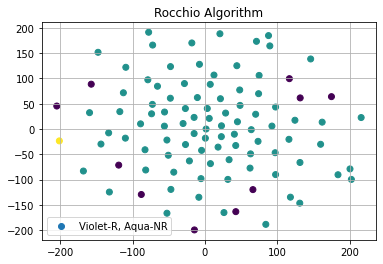

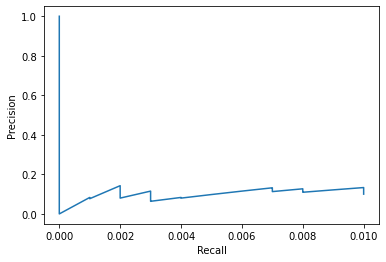

 iteration:  1
relevant_doc: [1538, 1795, 1444, 1833, 1740, 1228, 1682, 1655, 1656, 1949]
score: [[3268, 825847.2694884207], [4744, 824588.3973277035], [3842, 754645.0789205636], [4718, 710816.8645076015], [4601, 605928.8665625795], [3664, 605136.4468640698], [3844, 584953.918252273], [3370, 583960.8043120682], [4882, 578210.5522548696], [3398, 567392.656406915], [3701, 556330.5318032578], [1833, 553797.6120289589], [3187, 536843.8555968085], [1949, 505733.5873934274], [4171, 496167.63826506137], [4015, 466278.4087222644], [3395, 461583.97364351474], [3350, 461347.534098511], [3162, 459709.70932611695], [2367, 450549.37174486904], [3785, 442204.3150218199], [2674, 438931.7280456491], [3256, 438190.2347509248], [4763, 427404.96943378326], [2155, 426496.6000530677], [1538, 421670.703382543], [4383, 420750.1397558622], [3299, 404970.99208796065], [4655, 394312.8506846086], [3761, 386056.26479431364], [4017, 383812.9806651924], [3147, 383255.7393007372], [3294, 376009.0624460326], [4541, 3

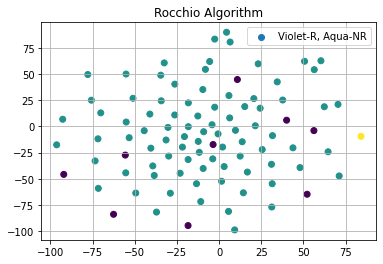

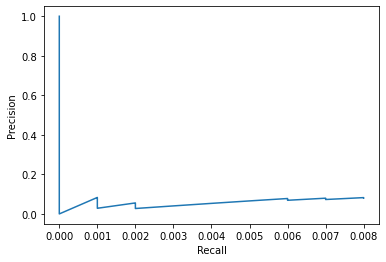

 iteration:  2
relevant_doc: [1795, 1542, 1447, 18361833, 1833, 1836, 1964, 1228, 4049]
score: [[3268, 825846.9047846552], [4744, 824588.3973277035], [3842, 754645.0789205636], [4718, 710816.8645076015], [4601, 605928.8665625795], [3664, 605136.4468640698], [3844, 584953.918252273], [3370, 583960.8043120682], [4882, 578210.090260455], [3398, 567392.656406915], [3701, 556330.3231417171], [1833, 553797.6120289589], [3187, 536843.8555968085], [1949, 505733.2028697746], [4171, 496167.2123359993], [4015, 466278.4087222644], [3395, 461583.97364351474], [3350, 461347.534098511], [3162, 459709.70932611695], [2367, 450548.98488062754], [3785, 442204.00391971576], [2674, 438931.13492999284], [3256, 438189.93432741414], [4763, 427404.4422302635], [2155, 426496.0653310863], [1538, 421670.703382543], [4383, 420749.82269521384], [3299, 404970.99208796065], [4655, 394312.4980373604], [3761, 386056.26479431364], [4017, 383812.9806651924], [3147, 383255.7393007372], [3294, 376009.0624460326], [4541, 37

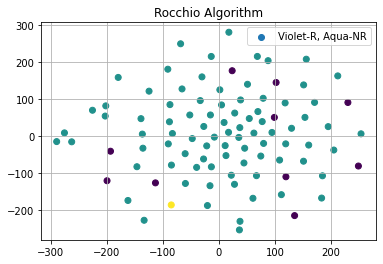

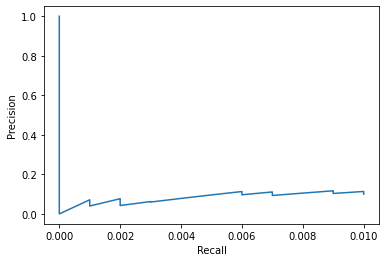

 iteration:  3
relevant_doc: [1538, 1444, 1542, 1447, 1740, 1964, 1682, 1655, 1656, 1949]
score: [[3268, 825846.9047846552], [4744, 824588.3973277035], [3842, 754645.0789205636], [4718, 710816.8645076015], [4601, 605928.8665625795], [3664, 605136.4468640698], [3844, 584953.918252273], [3370, 583960.8043120682], [4882, 578210.090260455], [3398, 567392.656406915], [3701, 556330.3231417171], [1833, 553797.6120289589], [3187, 536843.8555968085], [1949, 505733.2028697746], [4171, 496167.2123359993], [4015, 466278.4087222644], [3395, 461583.97364351474], [3350, 461347.534098511], [3162, 459709.70932611695], [2367, 450548.98488062754], [3785, 442204.00391971576], [2674, 438931.13492999284], [3256, 438189.93432741414], [4763, 427404.4422302635], [2155, 426496.0653310863], [1538, 421670.703382543], [4383, 420749.82269521384], [3299, 404970.99208796065], [4655, 394312.4980373604], [3761, 386056.26479431364], [4017, 383812.9806651924], [3147, 383255.7393007372], [3294, 376009.0624460326], [4541, 

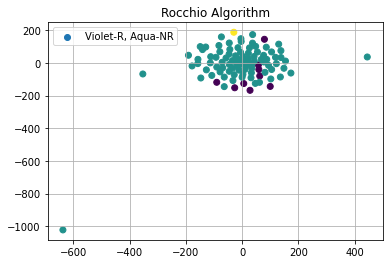

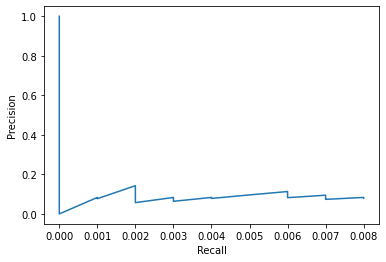

In [31]:

k=int(input("enter value of k : "))
p=int(input("enter value of p : "))
list_of_map=[]
gt=["sci.med","talk.politics.misc","sci.med"]
q=["Pretty good opinions on biochemistry machines","Scientific tools for preserving rights and body","Frequently asked questions on State-of-the-art visualisation tools"]
alpha=1
beta=0.75
gamma=0.25
for i in range(0,len(gt)):
  m=Rocchio(q[i],alpha,beta,gamma,k,p,gt[i])
  list_of_map.append(m)
  


In [35]:
for i in list_of_map:
  print("print of all iteration here as as summation:",i[0])

print of all iteration here as as summation: 0.09188658144448007
print of all iteration here as as summation: 0.07679587725806485
print of all iteration here as as summation: 0.09751830801359103
ERROR! Session/line number was not unique in database. History logging moved to new session 59
